In [1]:
import scanpy as sc
adata=sc.read_h5ad("./data/GSE211785_Susztak_SC_SN_ATAC_merged_PreSCVI_final.h5ad")
adata=adata[adata.obs["tech"].isin(['SC_RNA','SN_RNA'])].copy()
print(adata)
print(adata.X[:10,:10])

AnnData object with n_obs × n_vars = 282610 × 34733
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'percent_mt', 'Gender', 'Status', 'Cluster_Idents', 'nCount_peaks', 'nFeature_peaks', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary', 'passed_filters', 'TSS_fragments', 'on_target_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'pct_reads_in_peaks', 'nucleosome_group', 'sample', 'sex', 'age', 'group', 'group2'
    var: 'vst.mean-0', 'vst.variance-0', 'vst.variance.expected-0', 'vst.variance.standardized-0', 'vst.variable-0', 'vst.mean-1', 'vst.variance-1', 'vst.variance.expected-1', 'vst.variance.standardized-1', 'vst.variable-1', 'name-2', 'n_counts'
    uns: 'dendrogram_Cluster_Idents_113Cluster', 'log1p', 'orig_ident_colors', 'tech_colors'
    obsm: 'X_harmony', 'X_lsi', 'X_pca', 'X_umap'
    layers: 'counts'
  (0, 2)	2.2007880210876465
  

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame(adata.obs[['Status','orig_ident']].copy())

# Remove duplicated rows
unique_df = df.drop_duplicates()

# Construct a dictionary mapping the first column to the second column
mapping_dict = dict(zip(unique_df['orig_ident'], unique_df['Status']))

print("Unique DataFrame:")
print(unique_df)
print("\nMapping Dictionary:")
print(mapping_dict)
print(np.unique(unique_df["Status"].values,return_counts=True))

Unique DataFrame:
                                    Status   orig_ident
HK2893.SN_AAACCCAAGAACTTCC-1_9_1   Control    HK2893.SN
HK2898.SN_AAACCCAAGACGATAT-1_11_1  Control    HK2898.SN
HK2862.SN_AAACCCAAGACTTGTC-1_15_1  Disease    HK2862.SN
HK2596.SN_AAACCCAAGATACCAA-1_16_1  Disease    HK2596.SN
HK2774.SN_AAACCCAAGATAGTGT-1_3_1   Disease    HK2774.SN
HK2899.SN_AAACCCAAGATTAGAC-1_12_1  Control    HK2899.SN
HK2844.SN_AAACCCAAGATTAGTG-1_13_1  Disease    HK2844.SN
HK2895.SN_AAACCCAAGCAGTCTT-1_10_1  Control    HK2895.SN
HK2868.SN_AAACCCAAGCCATTTG-1_7_1   Disease    HK2868.SN
HK2833.SN_AAACCCAAGCCGTTGC-1_5_1   Control    HK2833.SN
HK2770.SN_AAACCCAAGCGTTCCG-1_4_1   Disease    HK2663_SN
HK2867.SN_AAACCCAAGCGTTGTT-1_6_1   Control    HK2867.SN
HK2739.SN_AAACCCAAGCTCTTCC-1_14_1  Disease    HK2739.SN
HK2558.SN_AAACCCAAGGAGTACC-1_2_1   Disease    HK2558.SN
HK2891.SN_AAACCCACAATGTTGC-1_8_1   Control    HK2891.SN
HK2663.SN_AAACCCACAGAATCGG-1_1_1   Control    HK2770_SN
HK2711.SN_AAACCCAAGACTACCT-1_1

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame(adata.obs[['tech','orig_ident']].copy())

# Remove duplicated rows
unique_df = df.drop_duplicates()

# Construct a dictionary mapping the first column to the second column
mapping_dict = dict(zip(unique_df['orig_ident'], unique_df['tech']))

print("Unique DataFrame:")
print(unique_df)
print("\nMapping Dictionary:")
print(mapping_dict)
print(np.unique(unique_df["tech"].values,return_counts=True))

Unique DataFrame:
                                     tech   orig_ident
HK2893.SN_AAACCCAAGAACTTCC-1_9_1   SN_RNA    HK2893.SN
HK2898.SN_AAACCCAAGACGATAT-1_11_1  SN_RNA    HK2898.SN
HK2862.SN_AAACCCAAGACTTGTC-1_15_1  SN_RNA    HK2862.SN
HK2596.SN_AAACCCAAGATACCAA-1_16_1  SN_RNA    HK2596.SN
HK2774.SN_AAACCCAAGATAGTGT-1_3_1   SN_RNA    HK2774.SN
HK2899.SN_AAACCCAAGATTAGAC-1_12_1  SN_RNA    HK2899.SN
HK2844.SN_AAACCCAAGATTAGTG-1_13_1  SN_RNA    HK2844.SN
HK2895.SN_AAACCCAAGCAGTCTT-1_10_1  SN_RNA    HK2895.SN
HK2868.SN_AAACCCAAGCCATTTG-1_7_1   SN_RNA    HK2868.SN
HK2833.SN_AAACCCAAGCCGTTGC-1_5_1   SN_RNA    HK2833.SN
HK2770.SN_AAACCCAAGCGTTCCG-1_4_1   SN_RNA    HK2663_SN
HK2867.SN_AAACCCAAGCGTTGTT-1_6_1   SN_RNA    HK2867.SN
HK2739.SN_AAACCCAAGCTCTTCC-1_14_1  SN_RNA    HK2739.SN
HK2558.SN_AAACCCAAGGAGTACC-1_2_1   SN_RNA    HK2558.SN
HK2891.SN_AAACCCACAATGTTGC-1_8_1   SN_RNA    HK2891.SN
HK2663.SN_AAACCCACAGAATCGG-1_1_1   SN_RNA    HK2770_SN
HK2711.SN_AAACCCAAGACTACCT-1_1_2   SN_RNA    HK

In [9]:
print(adata)

AnnData object with n_obs × n_vars = 282610 × 34733
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'tech', 'percent_mt', 'Gender', 'Status', 'Cluster_Idents', 'nCount_peaks', 'nFeature_peaks', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary', 'passed_filters', 'TSS_fragments', 'on_target_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'pct_reads_in_peaks', 'nucleosome_group', 'sample', 'sex', 'age', 'group', 'group2'
    var: 'vst.mean-0', 'vst.variance-0', 'vst.variance.expected-0', 'vst.variance.standardized-0', 'vst.variable-0', 'vst.mean-1', 'vst.variance-1', 'vst.variance.expected-1', 'vst.variance.standardized-1', 'vst.variable-1', 'name-2', 'n_counts'
    uns: 'dendrogram_Cluster_Idents_113Cluster', 'log1p', 'orig_ident_colors', 'tech_colors'
    obsm: 'X_harmony', 'X_lsi', 'X_pca', 'X_umap'
    layers: 'counts'


In [10]:
import numpy as np
for i in adata.obs.columns:
    try:
        unique=np.unique(adata.obs[i])
        if len(unique)<100:
            print(i, len(unique),unique)
    except:
        continue

orig_ident 47 ['HK1584.SC' 'HK1585.SC' 'HK1588.SC' 'HK1593.SC' 'HK1594.SC' 'HK1597.SC'
 'HK1632.SC' 'HK1634.SC' 'HK1635_G.SC' 'HK1635_T.SC' 'HK1650_G.SC'
 'HK1650_T.SC' 'HK1664_G.SC' 'HK1664_T.SC' 'HK1770.SC' 'HK1997.SC'
 'HK2558.SN' 'HK2596.SN' 'HK2662.SC' 'HK2663_SN' 'HK2711.SN' 'HK2713.SC'
 'HK2739.SN' 'HK2770.SC' 'HK2770_SN' 'HK2774.SC' 'HK2774.SN' 'HK2833.SC'
 'HK2833.SN' 'HK2844.SN' 'HK2862.SN' 'HK2867.SC' 'HK2867.SN' 'HK2868.SN'
 'HK2891.SC' 'HK2891.SN' 'HK2893.SC' 'HK2893.SN' 'HK2895.SC' 'HK2895.SN'
 'HK2896.SC' 'HK2898.SN' 'HK2899.SC' 'HK2899.SN' 'HK2923.SC' 'HK2924.SC'
 'HK2976.SN']
tech 2 ['SC_RNA' 'SN_RNA']
Gender 2 ['Female' 'Male']
Status 2 ['Control' 'Disease']
Cluster_Idents 41 ['Ascending_Thin_LOH' 'B_Naive' 'B_memory' 'Baso/Mast' 'CD14_Mono'
 'CD16_Mono' 'CD4T' 'CD8T' 'CNT' 'C_TAL' 'DCT1' 'DCT2' 'Des-Thin_Limb'
 'Endo_GC' 'Endo_Lymphatic' 'Endo_Peritubular' 'Fibroblast_1'
 'Fibroblast_2' 'GS_Stromal' 'IC_A' 'IC_B' 'M_TAL' 'Mac' 'Macula_Densa'
 'Mes' 'MyoFib/VSMC' 'NK'

In [3]:
adata=adata[adata.obs["tech"].isin(['SC_RNA','SN_RNA'])].copy()
print(adata.X[:10,:10])

  (0, 2)	2.2007880210876465
  (3, 3)	3.086092233657837


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


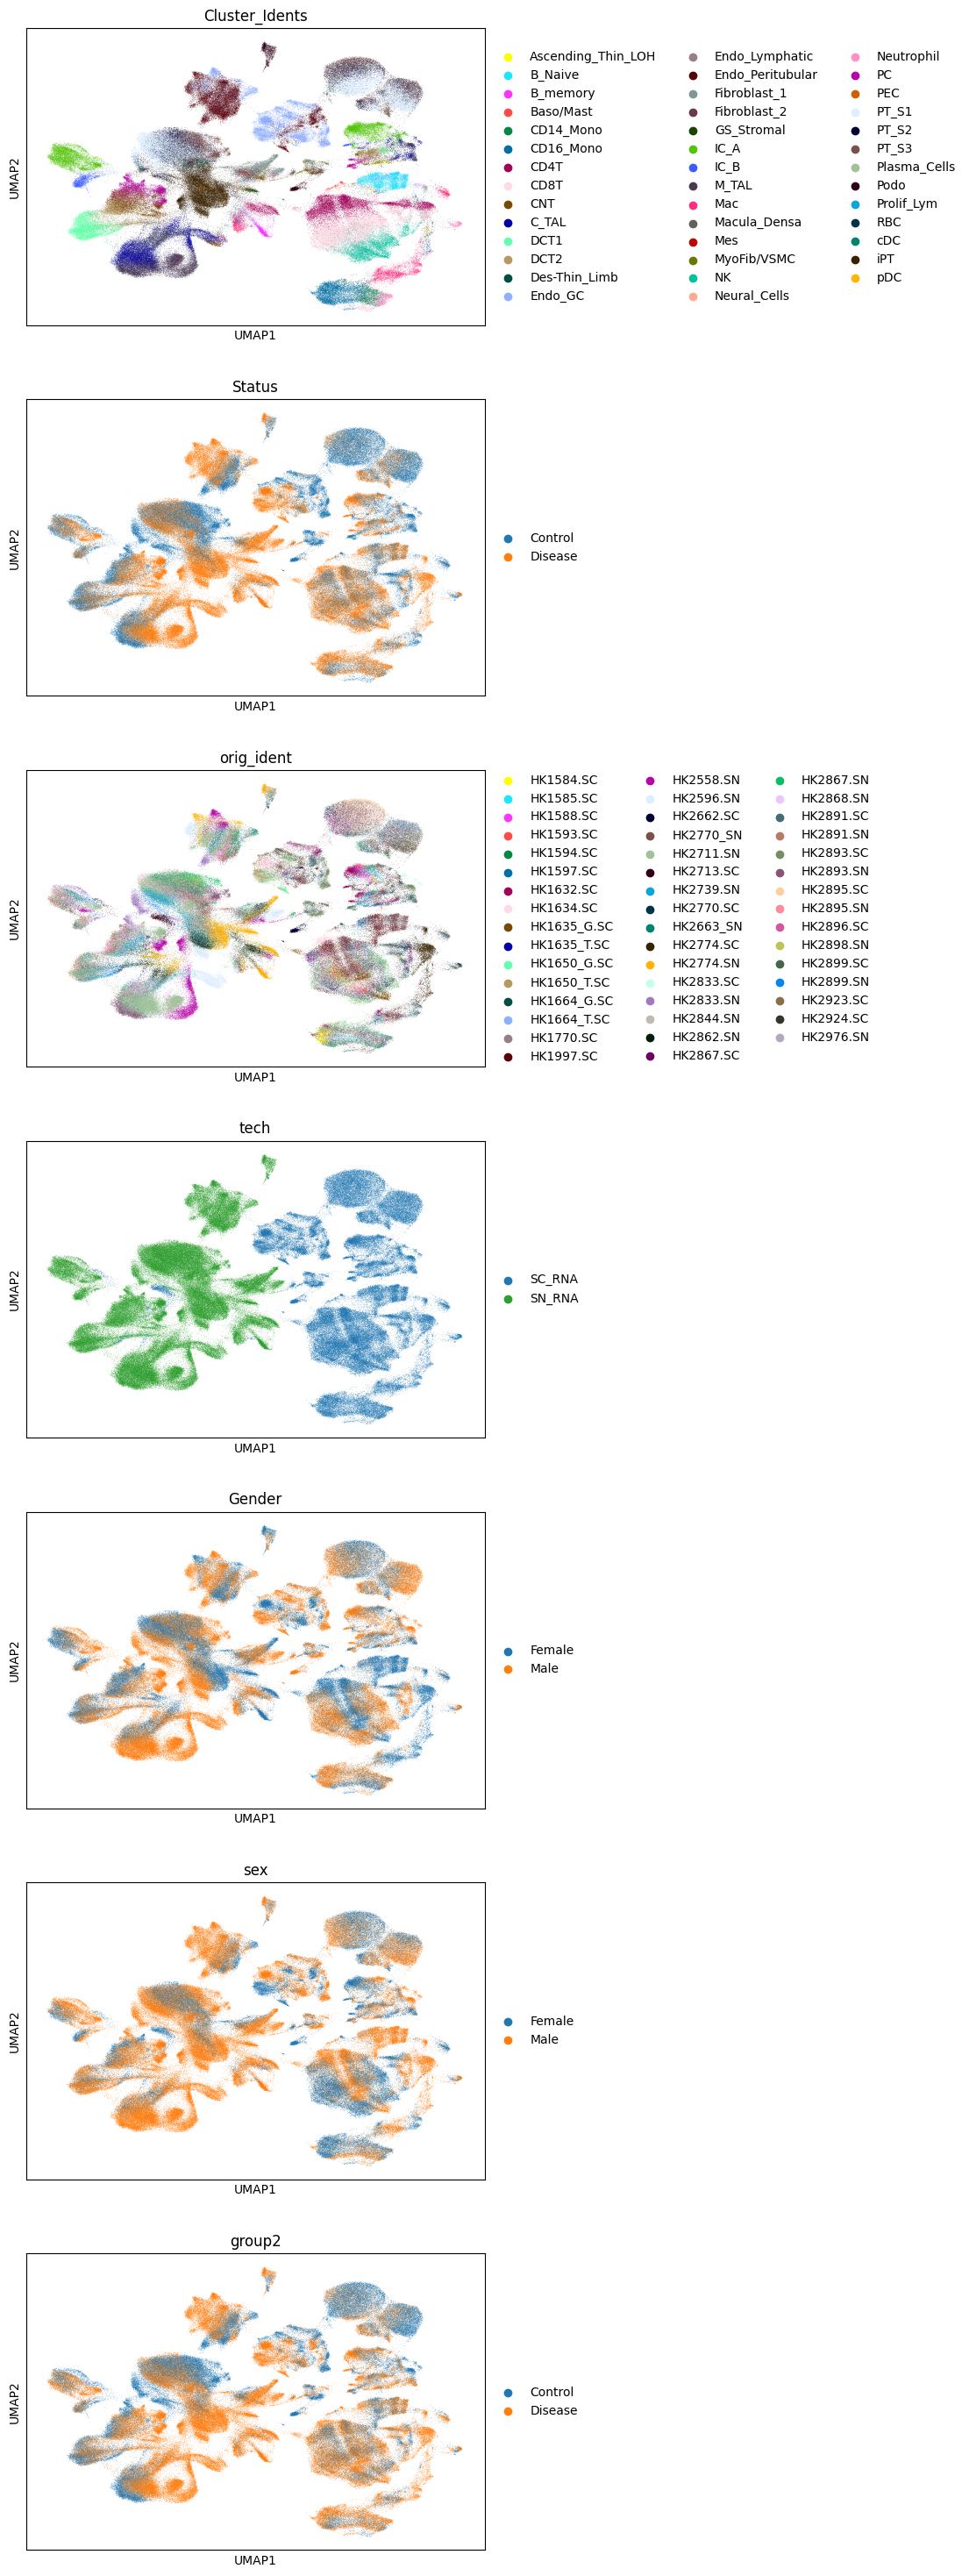

In [4]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color=["Cluster_Idents","Status","orig_ident","tech","Gender","sex","group2"],ncols=1)

In [5]:
df=adata.obs.copy()

# Group by Cluster_Idents and tech, and count the number of cells
cell_counts = df.groupby(["Cluster_Idents", "tech"]).size().reset_index(name="cell_count")

# Print the results
print("Number of cells in each tech for each cluster:")
print(cell_counts.to_string())

Number of cells in each tech for each cluster:
        Cluster_Idents    tech  cell_count
0   Ascending_Thin_LOH  SC_RNA         419
1   Ascending_Thin_LOH  SN_RNA         259
2              B_Naive  SC_RNA        5970
3              B_Naive  SN_RNA         379
4             B_memory  SC_RNA         336
5             B_memory  SN_RNA        1477
6            Baso/Mast  SC_RNA         377
7            Baso/Mast  SN_RNA           0
8            CD14_Mono  SC_RNA        1803
9            CD14_Mono  SN_RNA          16
10           CD16_Mono  SC_RNA        7437
11           CD16_Mono  SN_RNA         396
12                CD4T  SC_RNA       11879
13                CD4T  SN_RNA        2498
14                CD8T  SC_RNA       22171
15                CD8T  SN_RNA        1928
16                 CNT  SC_RNA        1114
17                 CNT  SN_RNA        7999
18               C_TAL  SC_RNA        2007
19               C_TAL  SN_RNA       13989
20                DCT1  SC_RNA         728
21     

/tmp/ipykernel_2922949/508723767.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = df.groupby(["Cluster_Idents", "tech"]).size().reset_index(name="cell_count")


In [6]:
import numpy as np
print(np.max(adata.X))

8.94521


In [8]:
sample_tech=np.unique(adata.obs['orig_ident']).tolist()
sample=np.unique([i.split('.')[0] for i in sample_tech])
print(len(sample))

40
